In [57]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import statsmodels.api as sm

# Q1 Hypothesis Testing Exercise 

* A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.
!

In [ ]:
# HO = μ1=μ2 there is no significant difference in the diameter of the cutlet between two units.
# HA = μ1≠μ2 there is any significant difference in the diameter of the cutlet between two units.

In [9]:
# Load the dataset

cutlets = pd.read_csv('https://raw.githubusercontent.com/1rashikashrirame/Dataset/main/Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
# Control Group
unit_A = pd.Series(data.iloc[:,0])
unit_A

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [5]:
# Treatment  Group
unit_B = pd.Series(data.iloc[:,1])
unit_B

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

# Plotting the data

for checking outlier is available or not?

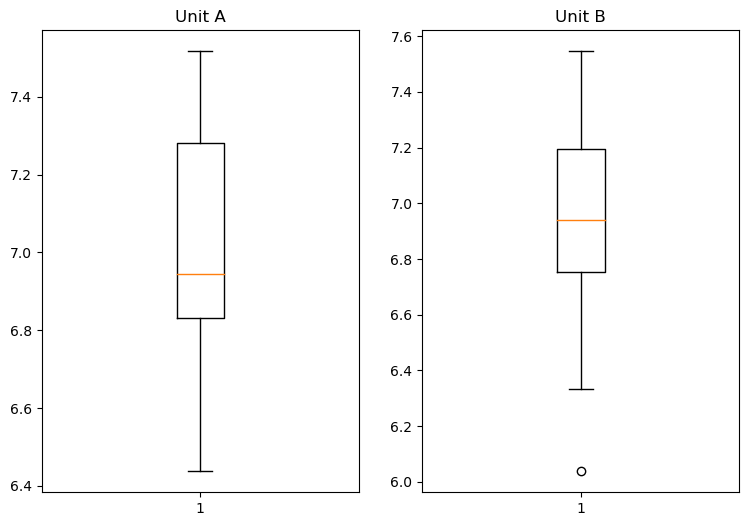

In [15]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

# Plotting Q-Q plot to check whether the distribution follows normal distribution or not

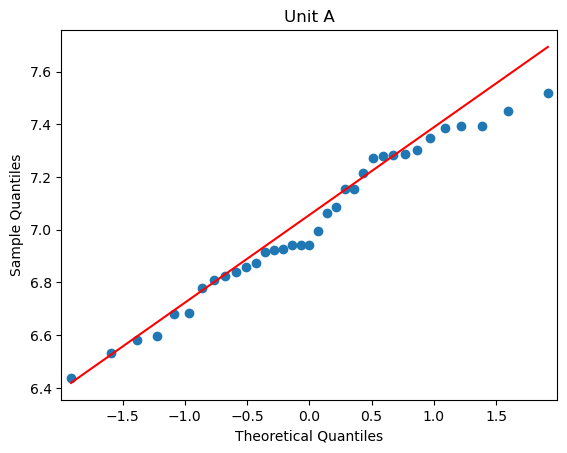

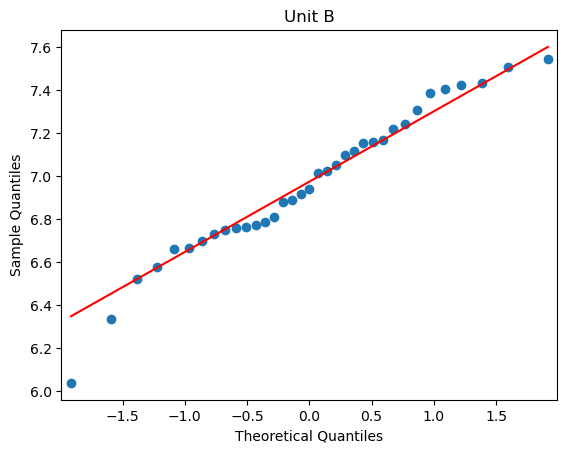

In [20]:
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

# Compare Evidences with Hypothesis using t-statistics

In [10]:
statistic , p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


In [7]:
p_value[1] # 2-tail probability

0.4722394724599501

In [21]:
# compare p_value with α = 0.025(At 5% significance level)
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


# Ans:- Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples.

# Q2 
* A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


# We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data.
# We need to check whether the mean of any of these samples are different or the same?

* Null Hypothesis :- μ1=μ2=μ3=μ4
* Alternate Hypothesis :- Altlest one of them is different.

# * Importing File

In [4]:
labtat = pd.read_csv('https://raw.githubusercontent.com/1rashikashrirame/Dataset/main/LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


# * Applying Descriptive Statistic

In [5]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


# * Checking for null Value

In [7]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

# * Checking for Duplicate 

In [8]:
labtat[labtat.duplicated()].shape

(0, 4)

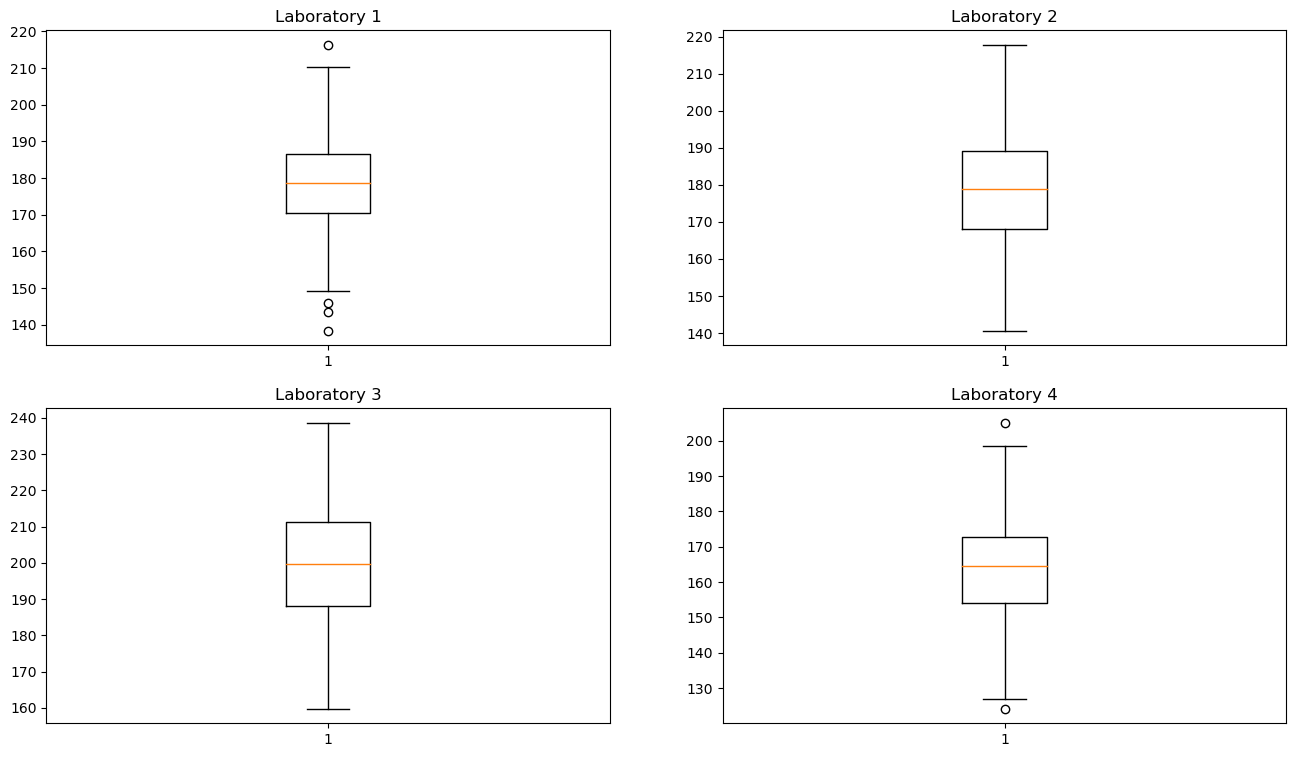

In [9]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

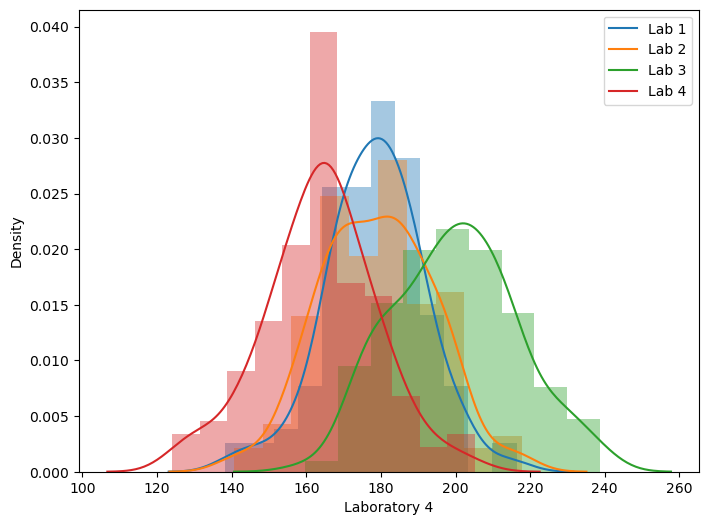

In [10]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)

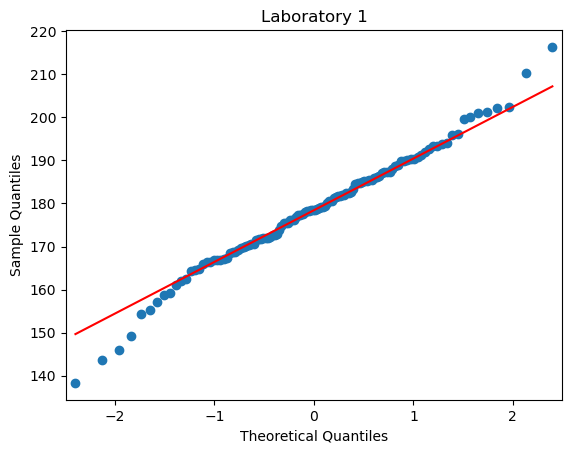

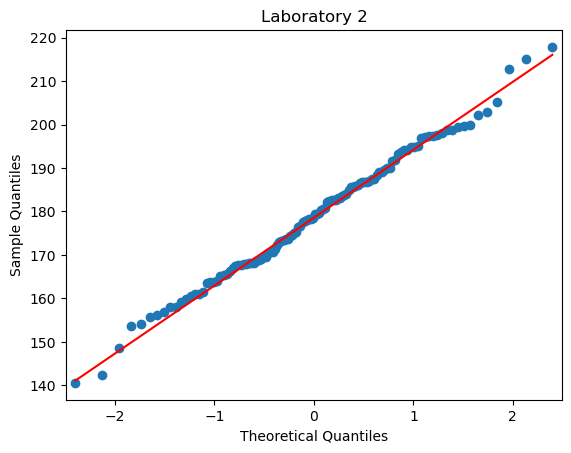

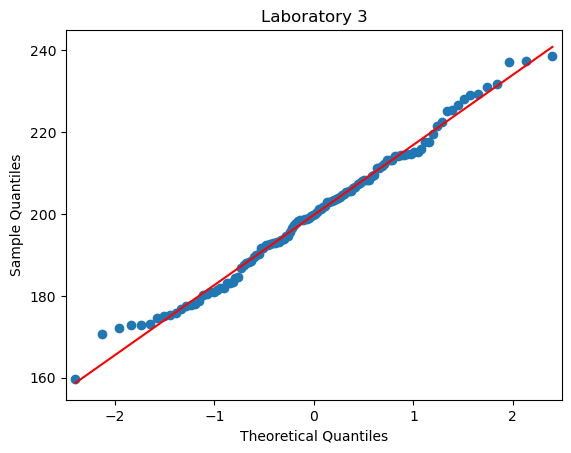

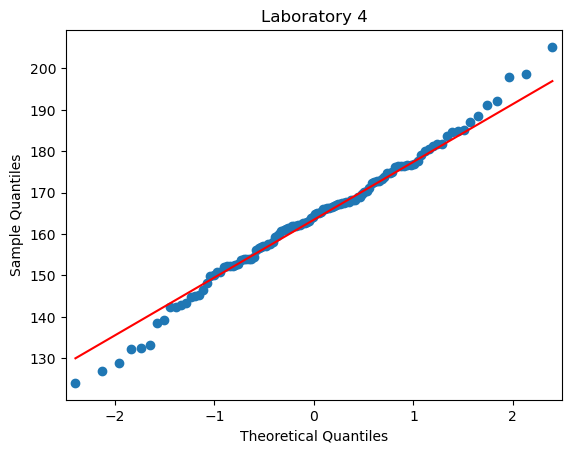

In [11]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

# * Compare Evidences with Hypothesis using t-statictic

In [13]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


# Compare p_value with 'α' (Significane Level)
If p_value is ≠ 'α' we failed to reject Null Hypothesis because of lack of evidence

If p_value is = 'α' we reject Null Hypothesis

* interpreting p-value

In [14]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


* Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# Q3

* Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

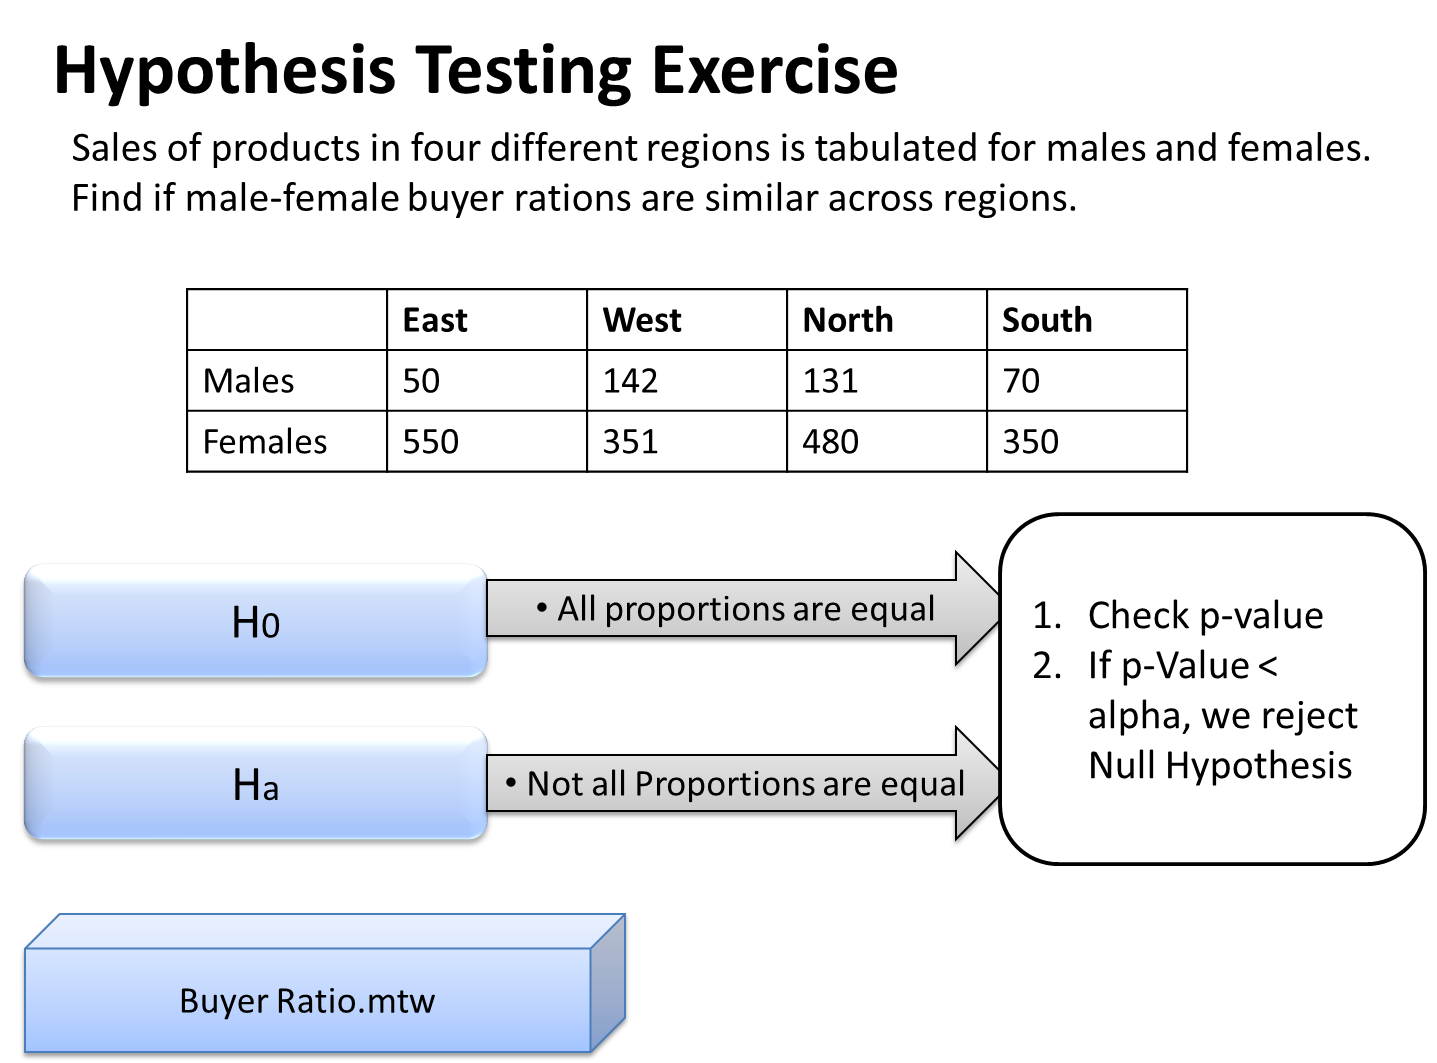

* Null Hypotesting = There is no association or ddependancy between the gender based buyer ration across regions
* Alternate Hypothesis = There is association or ddependancy between the gender based buyer ration across regions

In [18]:
# Importing File

buyer = pd.read_csv('https://raw.githubusercontent.com/1rashikashrirame/Dataset/main/BuyerRatio.csv')
buyer

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [19]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [20]:
table = table = [[50,142,131,70],
        [435,1523,1356,750]]

In [59]:
stats,p_value,dof,exp_freq = stats.chi2_contingency(table)


In [55]:
stats,p_value

(1.595945538661058, 0.6603094907091882)

In [38]:
print('Significnace=%.3f, p=%.3f'%(0.05,p_value))
if p_value < 0.05:
    print('Reject Null Hypothesis.There is association or ddependancy between the gender based buyer ration across regions.')
else:
    print('Fail to reject null hypothesis.')

Significnace=0.050, p=0.660
Fail to reject null hypothesis.


# Ans:- We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# * Q 4
*TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences?

* Null Hypothesis :- μ1=μ2=μ3=μ4
* Alternate Hypothesis :- Altlest one of them is different.

In [41]:
centers = pd.read_csv('https://raw.githubusercontent.com/1rashikashrirame/Dataset/main/Costomer%2BOrderForm.csv')
centers.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [42]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [43]:
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [44]:
print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


# Creating Contingency table

In [45]:
contingency_table = [[271,267,269,280],[29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [58]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)

In [61]:
stat , df

(3.858960685820355, 3)

In [62]:
p

0.2771020991233135

In [64]:
print('Significnace=%.3f, p=%.3f'%(0.05,p))
if p < 0.05:
    print('Reject Null Hypothesis.')
else:
    print('Fail to reject null hypothesis.')

Significnace=0.050, p=0.277
Fail to reject null hypothesis.


# Ans:- We fail to reject null hypothesis.Columns are independent to each other. 